In [12]:
from torchviz import make_dot
import torch
from torch import nn

In [13]:
STORAGE_PATH_MODELS = "../../persisted_data/models/{}"

In [14]:
# small neural network for predicting the future price or volatility
class PriceHistoryNetwork(nn.Module):
    def __init__(self, input_neurons=24):
        super().__init__() 
        # define layers 
        self.fc1 = nn.Linear(input_neurons, 12)
        self.sigm1 = nn.Sigmoid()
        self.fc2 = nn.Linear(12, 8)
        self.sigm2 = nn.Sigmoid()
        self.fc3 = nn.Linear(8, 1)
        self.sigm3 = nn.Sigmoid()


    def forward(self, x):
        x = self.fc1(x)
        x = self.sigm1(x)
        x = self.fc2(x)
        x = self.sigm2(x)
        x = self.fc3(x)
        x = self.sigm3(x)
        return x

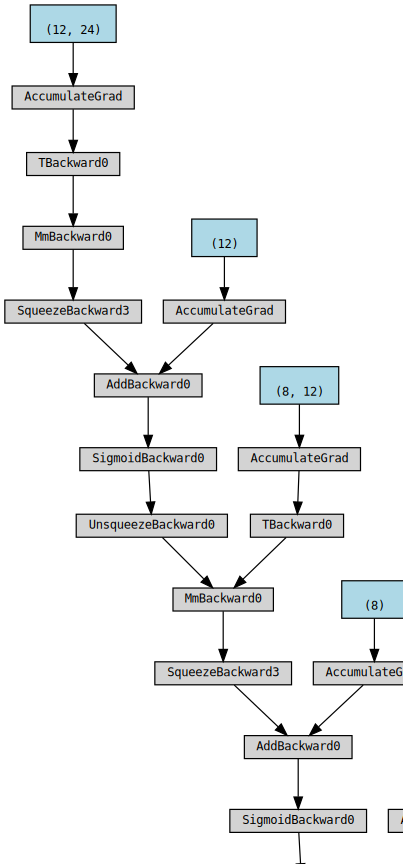

In [16]:
net = PriceHistoryNetwork()
net.load_state_dict(torch.load(STORAGE_PATH_MODELS.format("price_predictor_net_standard.pth")))
x = torch.zeros(24, dtype=torch.float)
out = net(x)

make_dot(out)